In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [4]:
# Load the dataset
data = pd.read_csv('synthesized_data.csv')

In [5]:
# Extract input and output columns
X = data[['Min_Temperature', 'Max_Temperature', 'Min_Rainfall', 'Max_Rainfall', 'Temperature', 'Rainfall']]
y = data['Price']

In [6]:
# Normalize the input features
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# Normalize the output
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(np.array(y).reshape(-1, 1))

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [8]:
# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse')

/home/samarth5854/anaconda3/envs/PsycheSail/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=2)

Epoch 1/100


66/66 - 1s - 11ms/step - loss: 0.1153 - val_loss: 0.0884
Epoch 2/100
66/66 - 0s - 932us/step - loss: 0.0766 - val_loss: 0.0713
Epoch 3/100
66/66 - 0s - 906us/step - loss: 0.0693 - val_loss: 0.0655
Epoch 4/100
66/66 - 0s - 917us/step - loss: 0.0657 - val_loss: 0.0651
Epoch 5/100
66/66 - 0s - 837us/step - loss: 0.0619 - val_loss: 0.0610
Epoch 6/100
66/66 - 0s - 873us/step - loss: 0.0585 - val_loss: 0.0648
Epoch 7/100
66/66 - 0s - 921us/step - loss: 0.0561 - val_loss: 0.0544
Epoch 8/100
66/66 - 0s - 855us/step - loss: 0.0534 - val_loss: 0.0567
Epoch 9/100
66/66 - 0s - 974us/step - loss: 0.0501 - val_loss: 0.0470
Epoch 10/100
66/66 - 0s - 837us/step - loss: 0.0463 - val_loss: 0.0467
Epoch 11/100
66/66 - 0s - 841us/step - loss: 0.0455 - val_loss: 0.0419
Epoch 12/100
66/66 - 0s - 852us/step - loss: 0.0412 - val_loss: 0.0378
Epoch 13/100
66/66 - 0s - 824us/step - loss: 0.0371 - val_loss: 0.0342
Epoch 14/100
66/66 - 0s - 814us/step - loss: 0.0344 - val_loss: 0.0315
Epoch 15/100
66/66 - 0s - 81

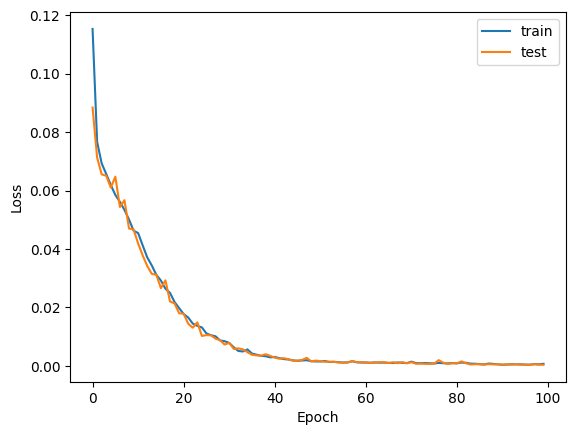

In [10]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
# Make predictions
y_pred = model.predict(X_test)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [12]:
# Calculate and print RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.019332097052137006


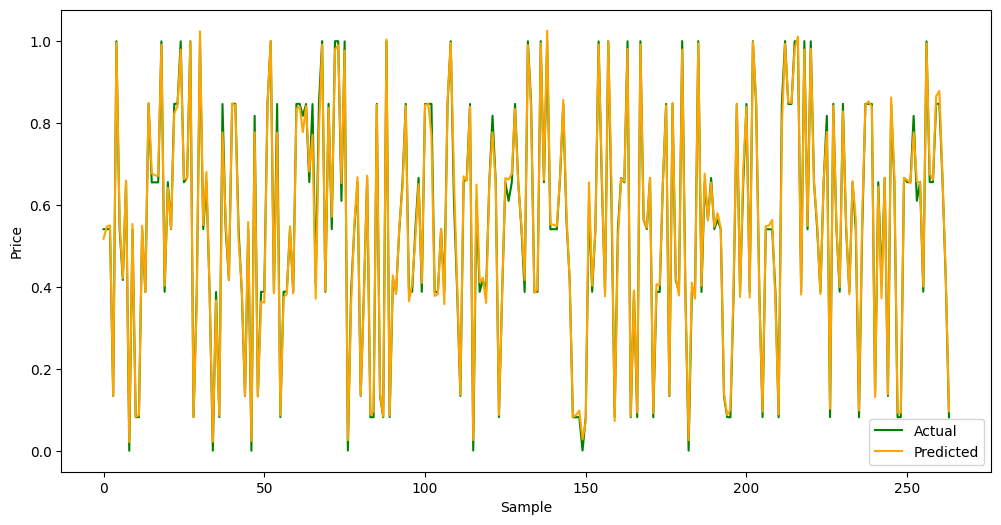

In [13]:
# Plot actual vs predicted prices with custom colors
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='green')
plt.plot(y_pred, label='Predicted', color='orange')
plt.xlabel('Sample')
plt.ylabel('Price')
plt.legend()
plt.show()